# Three Type of Clustering Apartment
---


# Introduction

Di dunia sewa-menyewa apartemen, memahami berbagai jenis properti yang tersedia sangat penting baik bagi penyewa maupun manajer properti. Pengelompokan atau clustering, sebuah metode untuk mengelompokkan apartemen yang serupa, memberikan cara yang jelas untuk mengkategorikan mereka berdasarkan fitur-fitur umum. Dengan memahami metode-metode clustering ini, kita dapat lebih mudah menavigasi pasar sewa-menyewa apartemen dan menemukan yang paling cocok untuk kebutuhan pelanggan kita.

In [1]:
# Melakukan import libraries yang akan digunakan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
import pickle

In [2]:
# Melakukan loading dataset
data_sebelum = pd.read_csv('properties_data.csv')
data_sesudah = pd.read_csv('data_setelah_clustering.csv', index_col=0)

# 1.Top 5 Location By Average Price


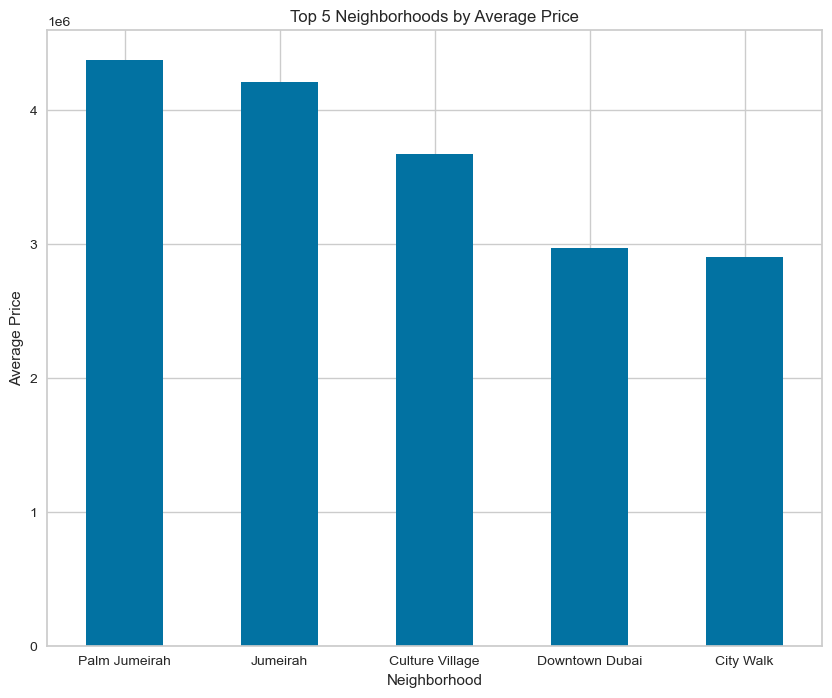

In [36]:
# Calculate the average price for each neighborhood
avg_price_by_neighborhood = data_sebelum.groupby('neighborhood')['price'].mean()

# Sort the average prices in descending order and select the top 5
top_5_avg_price = avg_price_by_neighborhood.sort_values(ascending=False).head(5)

# Plot bar chart for top 5 neighborhoods
plt.figure(figsize=(10, 8))
top_5_avg_price.plot(kind='bar')

# Add labels and title
plt.title('Top 5 Neighborhoods by Average Price')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=0) 
plt.grid(True)
plt.show()


Berdasarkan bar chart di atas, Palm Jumeirah, Jumeirah, Culture Village Neighborhood, Downtown Dubai, dan City Walk merupakan lima lokasi dengan rata-rata harga apartemen tertinggi di Dubai. Hal ini mungkin disebabkan karena lokasi tersebut merupakan lokasi pariwisata

# 2.Number of Bedrooms


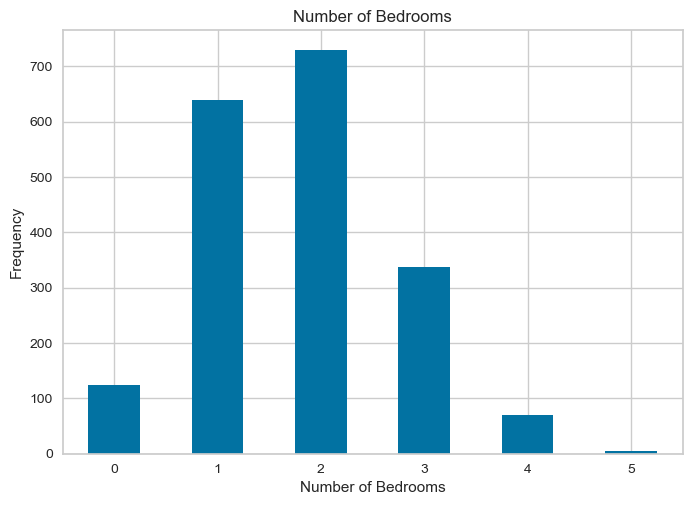

In [6]:
# Group data by 'no_of_bathrooms' and count frequencies
bathroom_counts = data_sebelum['no_of_bedrooms'].value_counts().sort_index()

# Plot bar chart
bathroom_counts.plot(kind='bar')

# Add labels and title
plt.title('Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()


Berdasarkan bar chart di atas, rata-rata apartemen di dubai memiliki 2 kamar tidur. Hal ini mungkin disebabkan karena rata-rata apartemen memiliki ukuran yang tidak terlalu besar sehingga dibatasi hanya memiliki 2 kamar tidur saja

# 3.Number of Bathrooms

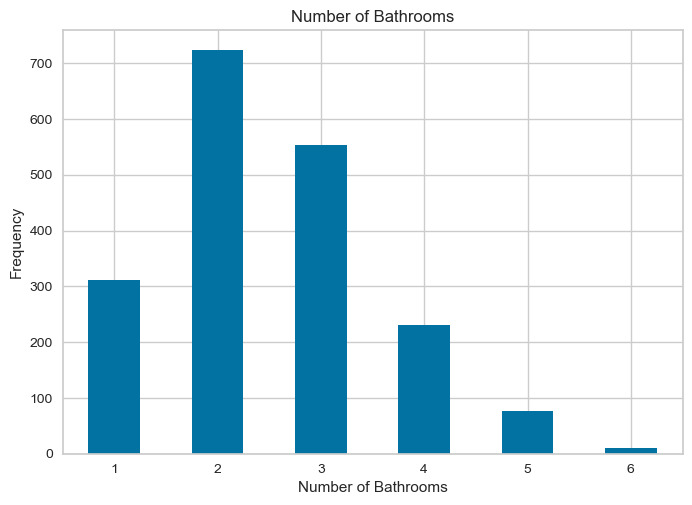

In [7]:
# Group data by 'no_of_bathrooms' and count frequencies
bathroom_counts = data_sebelum['no_of_bathrooms'].value_counts().sort_index()

# Plot bar chart
bathroom_counts.plot(kind='bar')

# Add labels and title
plt.title('Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()


Berdasarkan bar chart di atas, rata-rata apartemen di dubai memiliki 2 kamar mandi. Hal ini mungkin disebabkan karena rata-rata apartemen memiliki ukuran yang tidak terlalu besar sehingga dibatasi hanya memiliki 2 kamar mandi saja

# B. Data Cluster

# 1.Average Price location Based on Cluster (Top 5)

In [9]:
mean_data = data_sesudah.groupby('cluster')['price'].mean().reset_index()
mean_data['cluster'] = mean_data['cluster'].astype(int)  # Ensure 'cluster' column is of integer type
mean_data = mean_data.round(0).astype(int)
mean_data


,cluster,price
0,0,5698293
1,1,1616516
2,2,981004


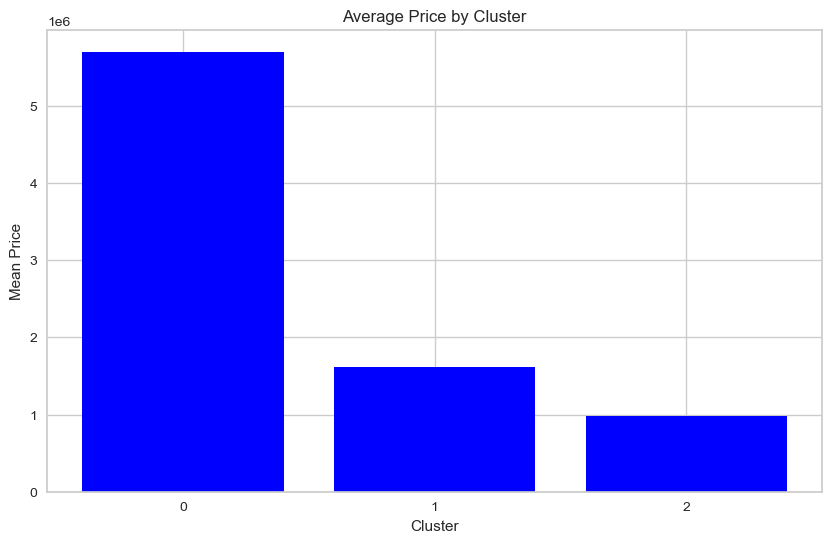

In [17]:
# Assuming mean_data is your DataFrame containing the mean prices for each cluster
clusters = mean_data['cluster']
mean_prices = mean_data['price']

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(clusters, mean_prices, color='blue')

# Add labels and title
plt.title('Average Price by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Price')
plt.xticks(clusters)
plt.grid(True)
plt.show()

Berdasarkan bar chart di atas, cluster 0 merupakan apartemen mewah, 1 merupakan apartemen menengah, dan 2 merupakan apartemen ekonomis. Hal ini dapat dilihat dari tingginya rata-rata cluster 0 dibandingkan dengan cluster 1 dan 2

# 1.Top 5 Location By Average Price Based on Price

<Figure size 1200x800 with 0 Axes>

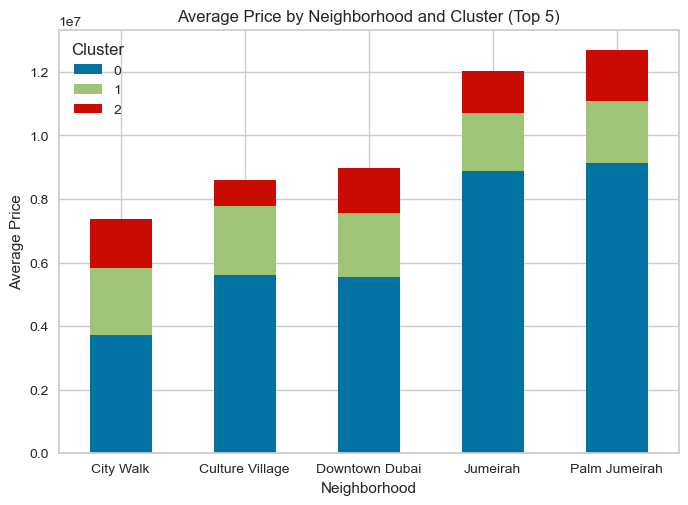

In [34]:
# Filter data for the top 5 neighborhoods
top_5_avg_price = avg_price_by_neighborhood.sort_values(ascending=False).head(5)
filtered_data = data_sesudah[data_sesudah['neighborhood'].isin(top_5_avg_price.index)]

# Group by 'neighborhood' and 'cluster', then calculate the average price for each group
avg_price_by_neighborhood_cluster = filtered_data.groupby(['neighborhood', 'cluster'])['price'].mean().unstack()

# Plot stacked bar chart for top 5 neighborhoods
plt.figure(figsize=(12, 8))
avg_price_by_neighborhood_cluster.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Average Price by Neighborhood and Cluster (Top 5)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Cluster', loc='upper left')
plt.show()


Berdasarkan bar chart di atas, cluster 0 memiliki proporsi terbesar dibandingkan kedua cluster lainnya pada kelima lokasi dengan rata-rata harga apartemen tertinggi. Hal ini menunjukkan bahwa kelima lokasi pariwisata tersebut banyak terdapat apartemen mewah.

# 2.Number of Bedrooms Based on Cluster

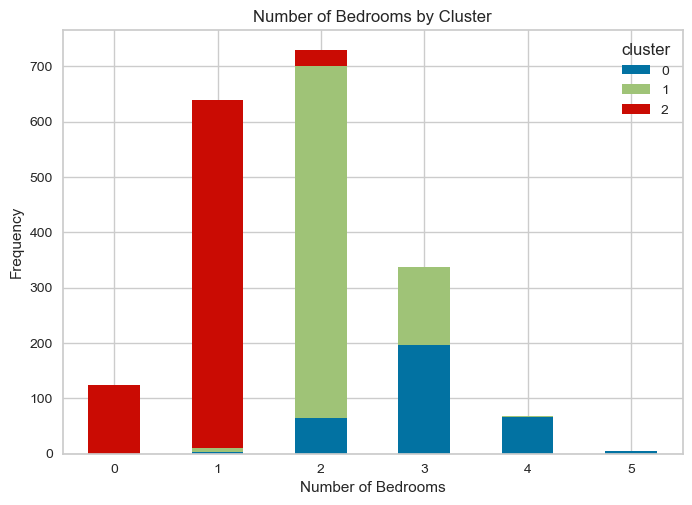

In [11]:
# Group data by 'no_of_bathrooms' and 'cluster', then count frequencies
bathroom_cluster_counts = data_sesudah.groupby(['no_of_bedrooms', 'cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
bathroom_cluster_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of Bedrooms by Cluster')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()


Berdasarkan bar chart di atas, cluster 2 rata-rata memiliki kamar tidur berada di antara 0 sampai 2, cluster 1 berada di antara 1-3, dan cluster 0 berada di antara 2-5 kamar tidur. Hal ini wajar karena jumlah kamar tidur menyesuaikan dengan jenis dan harga apartemen

# 3.Number of Bathrooms Based on Cluster

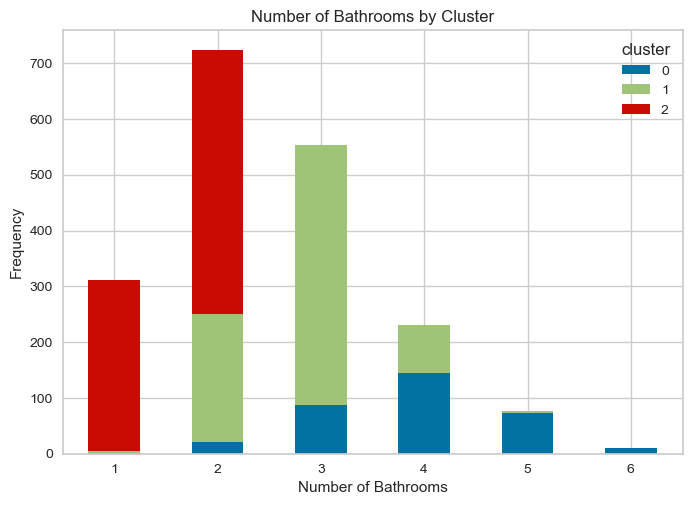

In [12]:
# Group data by 'no_of_bathrooms' and 'cluster', then count frequencies
bathroom_cluster_counts = data_sesudah.groupby(['no_of_bathrooms', 'cluster']).size().unstack(fill_value=0)

# Plot stacked bar chart
bathroom_cluster_counts.plot(kind='bar', stacked=True)

# Add labels and title
plt.title('Number of Bathrooms by Cluster')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)

# Show plot
plt.show()


Berdasarkan bar chart di atas, cluster 2 rata-rata memiliki kamar mandi berada di antara 1 sampai 2, cluster 1 berada di antara 2-4, dan cluster 0 berada di antara 2-6 kamar tidur. Hal ini wajar karena jumlah kamar mandi menyesuaikan dengan jenis dan harga apartemen